In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pdf = pd.read_csv("data/priority_privacy.csv")
pdf.head()

,platform,toggle_name,description,state,click_counts,category,url,image_path,is_personalized_ad
0,Spotify,Google,Indicates that a Google account is currently l...,active,2,security_authentication,https://www.spotify.com/us/account/login-methods,../gemini-team/picasso/Spotify/Edit login meth...,False
1,Spotify,Email and Password,Allows adding a traditional email and password...,not added,2,security_authentication,https://www.spotify.com/us/account/login-methods,../gemini-team/picasso/Spotify/Edit login meth...,False
2,Spotify,Apple,Allows adding an Apple ID as a login method.,not added,2,security_authentication,https://www.spotify.com/us/account/login-methods,../gemini-team/picasso/Spotify/Edit login meth...,False
3,Spotify,Close account,A confirmation checkbox to acknowledge that cl...,enabled,5,data_collection_tracking,https://www.spotify.com/us/account/close,../gemini-team/picasso/Spotify/Close account_h...,False
4,Spotify,Process my personal data for tailored ads,The toggle controls the tailored ads you exper...,enabled,1,data_collection_tracking,https://www.spotify.com/us/account/privacy,../gemini-team/picasso/Spotify/Account privacy...,False


<h1>Exploratory Data Analysis</h1>

In [3]:
pdf.isnull().sum()

platform              0
toggle_name           0
description           0
state                 0
click_counts          0
category              0
url                   0
image_path            0
is_personalized_ad    0
dtype: int64

In [4]:
pdf.groupby(['platform', 'category'])['url'].count().reset_index() # while i think this is informative to me, it is not useful for the audience

,platform,category,url
0,Facebook,communication_notifications,1
1,Facebook,data_collection_tracking,50
2,Facebook,data_sharing_third_parties,18
3,Facebook,identity_personal_info,11
4,Facebook,security_authentication,11
5,LinkedIn,communication_notifications,183
6,LinkedIn,data_collection_tracking,41
7,LinkedIn,data_sharing_third_parties,9
8,LinkedIn,identity_personal_info,16
9,LinkedIn,security_authentication,10


In [16]:
pdf.groupby('category')['click_counts'].describe() # unsure how reliable the category classifications are

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
communication_notifications,248.0,1.677419,0.753383,0.0,1.00,2.0,2.00,9.0
data_collection_tracking,151.0,1.827815,1.504489,0.0,1.00,1.0,2.00,6.0
data_sharing_third_parties,47.0,2.234043,1.820329,0.0,1.00,1.0,3.00,6.0
device_sensor_access,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
identity_personal_info,36.0,2.000000,1.772811,0.0,1.00,1.0,3.00,10.0
security_authentication,47.0,1.702128,1.317357,1.0,1.00,1.0,2.00,6.0
visibility_audience,94.0,1.191489,0.573174,0.0,1.00,1.0,1.00,3.0


<h1>Data Visualizations + Reasoning</h1>

- Boxplot to show the variance of click counts for each platform (quantity of clicks it takes to access them)
- Bar plot to show the diversity of privacy settings

The story of this visualization is to convey to the audience the diversity of privacy settings and user friendliness by analyzing platforms' UI/UX design decisions.

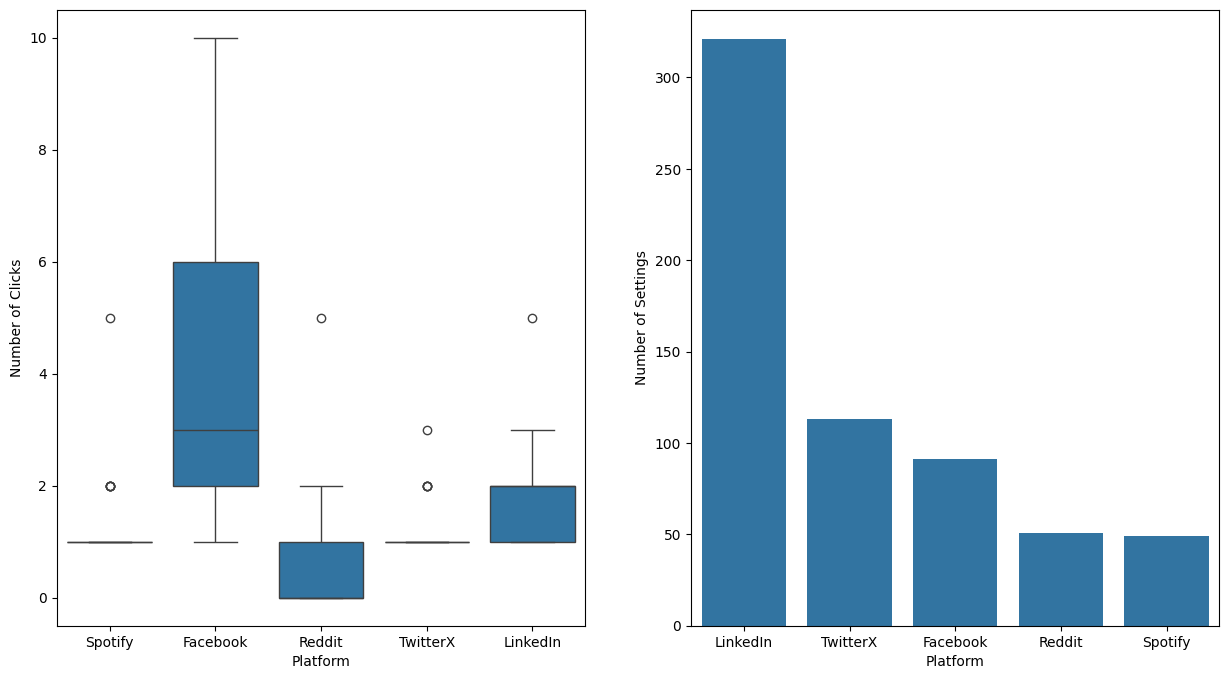

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes = axes.flatten()

count_df = pdf.groupby('platform')['url'].count().reset_index()
count_df.sort_values(by = 'url', ascending = False, inplace = True)

sns.boxplot(x="platform", y="click_counts", data=pdf, ax = axes[0])
sns.barplot(data=count_df, x="platform", y="url", ax = axes[1]) # possibly a treemap
# sns.despine(offset=10, trim=True)

axes[0].set_ylabel("Number of Clicks")
axes[0].set_xlabel("Platform")

axes[1].set_ylabel("Number of Settings")
axes[1].set_xlabel("Platform")

plt.show();

- Did you know that Linkedin and Twitter/X has a data usage for generative AI toggle? (hook + interesting insight)

In [7]:
generative_ai_settings = pdf[pdf['description'].apply(lambda x: 'model' in x.lower())]

generative_ai_settings.iloc[:,[0, 1, 2, 3]]

,platform,toggle_name,description,state
245,TwitterX,Allow your public data as well as your interac...,X may share with xAI your X public data as wel...,enabled
246,TwitterX,Allow X to personalize your experience with Grok,Allow your X data as well as your interactions...,enabled
521,LinkedIn,Use my data for training content creation AI m...,Can LinkedIn and its affiliates use your perso...,enabled


<a href='https://newsroom.spotify.com/2025-04-24/spotify-expands-ai-playlist-in-beta-to-premium-listeners-in-40-new-markets/'>AI DJ and AI Playlist</a>. While Spotify leverages AI and likely uses user data to train it, there has yet to be a setting for user permission even though competitors such as LinkedIn and Twitter/X have already done so. (AI is still an emerging topic so I think there's a lot of potential to influence the privacy design here)

- Integrating toggle states into the data visualization to show how default settings are configured to collect data from you
    - A lot of personalized advertisement settings

In [8]:
# is_personalized_ad = np.logical_or(pdf['description'].apply(lambda x: 'person' in x.lower()),
#                                     pdf['toggle_name'].apply(lambda y: 'personalized' in y.lower()))
# pdf['is_personalized_ad'] = is_personalized_ad

In [17]:
personalized_ad_settings = pdf[pdf['is_personalized_ad'] == True].groupby(['platform', 'is_personalized_ad', 'state'])['url'].count().reset_index().rename(columns = {'url': 'count'})

# filled in missing values for plot
personalized_ad_settings.loc[5] = ['Reddit', True, 'enabled', 0]
personalized_ad_settings.loc[6] = ['Reddit', True, 'disabled', 0]
personalized_ad_settings.loc[7] = ['Facebook', True, 'disabled', 0]
personalized_ad_settings.loc[8] = ['LinkedIn', True, 'disabled', 0]
personalized_ad_settings.loc[9] = ['Spotify', True, 'disabled', 0]

personalized_ad_settings.sort_values(by = ['platform', 'state'], ascending=False, inplace=True)
personalized_ad_settings

,platform,is_personalized_ad,state,count
4,TwitterX,True,enabled,5
3,TwitterX,True,disabled,2
2,Spotify,True,enabled,1
9,Spotify,True,disabled,0
5,Reddit,True,enabled,0
6,Reddit,True,disabled,0
1,LinkedIn,True,enabled,9
8,LinkedIn,True,disabled,0
0,Facebook,True,enabled,8
7,Facebook,True,disabled,0


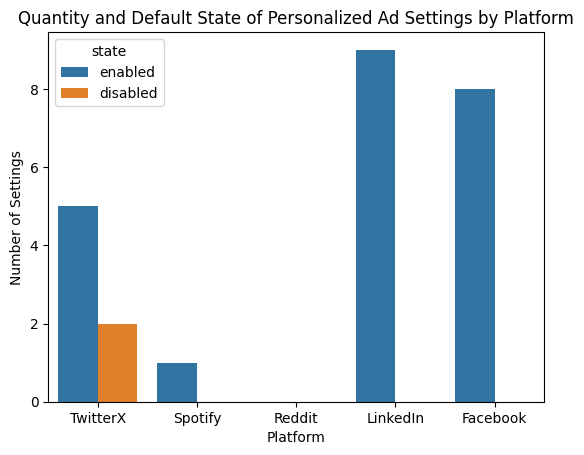

In [23]:
sns.barplot(data=personalized_ad_settings, x='platform', y='count', hue='state')

plt.title('Quantity and Default State of Personalized Ad Settings by Platform')
plt.ylabel('Number of Settings')
plt.xlabel('Platform')

plt.show();

- Number of clicks for a user to delete their account (this is a statement piece, just need to figure out the right way to do it though)
    - When do users typically give up or lose patience? (may need to refer to other studies/research)

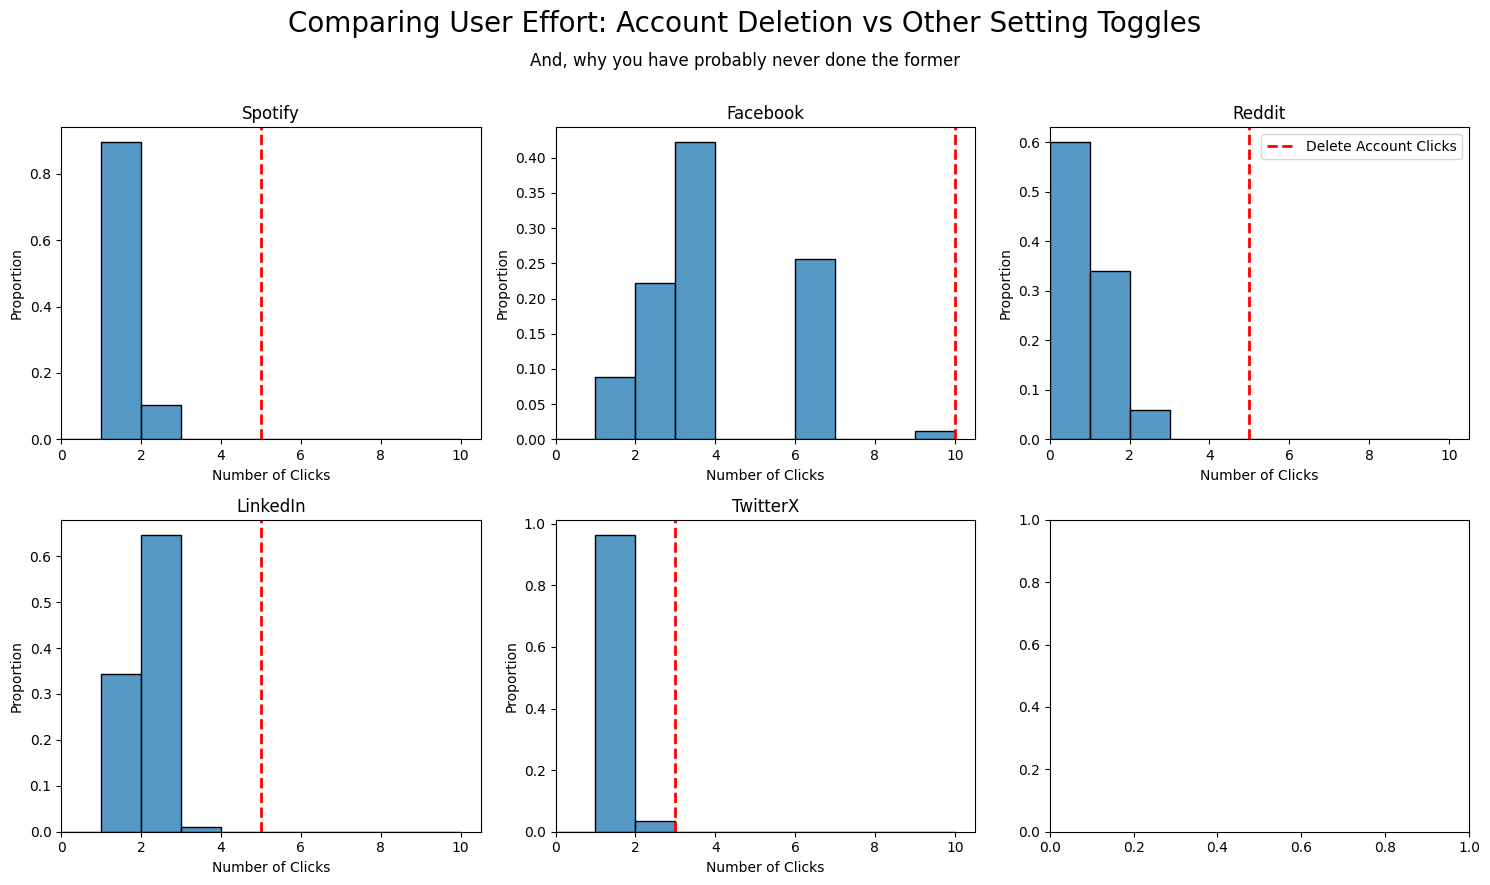

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

dict_ = {
    'Spotify': 3,
    'Facebook': 61,
    'Reddit': 147,
    'LinkedIn': 624,
    'TwitterX': 202
}

for ax, col in zip(axes, dict_.keys()):
    plat_ = col
    index_ = dict_[col]
    delete_stat = pdf.iloc[dict_[col]]['click_counts']

    data = pdf[pdf['platform'] == plat_]['click_counts'].drop([index_])
    bins_ = np.arange(0, 11, 1)

    sns.histplot(data, stat = 'probability', ax = ax, bins = bins_)

    ax.axvline(delete_stat, color="red", linestyle="--", linewidth=2, label = 'Delete Account Clicks')

    ax.set_xlim(left=0)
    ax.set_title(f"{col}")
    ax.set_xlabel('Number of Clicks')
    ax.set_ylabel('Proportion')

axes[2].legend()
plt.tight_layout()
fig.suptitle("Comparing User Effort: Account Deletion vs Other Setting Toggles", fontsize=20, y=1.1)
fig.text(0.5, 1.03,
         "And, why you have probably never done the former",
         ha="center", fontsize=12)
plt.show();